<h1 align="center"><font color='Green' <b><U>Machine learning Assignment 1</b></u></h1>
<font color='BLUE'><b><h3 align="right">Submitted By:-Mudrika Yaduvanshi</h3></b></font></p>

## Objective

- To make a predictive model to predict if the customer will respond positively to the campaign or not. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
bank=pd.read_csv(r"D:\money\datasets\\bank-marketing.csv",encoding='latin1')

In [3]:
bank.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [4]:
bank.shape

(45211, 19)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


## Checking for Null values in Dataset

In [6]:
bank.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

<font color='green'>Hence, We can confirm that there is No Null values present in dataset</font>

In [7]:
bank.describe()

age         salary        balance           day      duration  \
count  45211.000000   45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210   57006.171065    1362.272058     15.806419    258.163080   
std       10.618762   32085.718415    3044.765829      8.322476    257.527812   
min       18.000000       0.000000   -8019.000000      1.000000      0.000000   
25%       33.000000   20000.000000      72.000000      8.000000    103.000000   
50%       39.000000   60000.000000     448.000000     16.000000    180.000000   
75%       48.000000   70000.000000    1428.000000     21.000000    319.000000   
max       95.000000  120000.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

## Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values

In [8]:
bank.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

<font color='green'>From this we can analysis that Mean and Mediam value and fishy for column pdays because pdays(i.e- number of days that passed by after the client was last contacted from a previous campaign) can't be negative</font>

## Describe the pdays column again, this time limiting yourself to the relevant values of pdays.
How  different are the mean and the median values?

In [9]:
df=bank[bank['pdays']!=-1]['pdays'].mean()

In [10]:
df

224.57769165556496

In [11]:
df=bank[bank['pdays']!=-1]['pdays'].median()

In [12]:
df

194.0

<font color='green'>Here we can see that after limiting to the relevant values of pdays, There are lot of difference in mean and Meadian. So,</font>
here we are not going to use the customer that were not contacted previously for campaign. and listed as -1,i am replacing
values which is less than 0 that means -1 values with NaN  and for that creating copy of the existing dataset using copy() function

In [13]:
bank_new=bank.copy()
bank_new.drop(bank_new[bank_new['pdays']<0].index ,inplace=True)
bank_new['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [14]:
bank_new['pdays'].mean(),bank_new['pdays'].median()

(224.57769165556496, 194.0)

<font color='green'>we have removed the customer that were not contacted previously for campaign</font>

In [15]:
bank_new

age           job  salary  marital  education targeted default  \
24060   33        admin.   50000  married   tertiary      yes      no   
24062   42        admin.   50000   single  secondary      yes      no   
24064   33      services   70000  married  secondary      yes      no   
24072   36    management  100000  married   tertiary      yes      no   
24077   36    management  100000  married   tertiary      yes      no   
...    ...           ...     ...      ...        ...      ...     ...   
45199   34   blue-collar   20000   single  secondary      yes      no   
45201   53    management  100000  married   tertiary      yes      no   
45204   73       retired   55000  married  secondary      yes      no   
45208   72       retired   55000  married  secondary      yes      no   
45210   37  entrepreneur  120000  married  secondary      yes      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \
24060      882      no   no  telephone   21   oct        39         1    151   
24062     -247     yes  yes  telephone   21   oct       519         1    166   
24064     3444     yes   no  telephone   21   oct       144         1     91   
24072     2415     yes   no  telephone   22   oct        73         1     86   
24077        0     yes   no  telephone   23   oct       140         1    143   
...        ...     ...  ...        ...  ...   ...       ...       ...    ...   
45199     1475     yes   no   cellular   16   nov      1166         3    530   
45201      583      no   no   cellular   17   nov       226         1    184   
45204     2850      no   no   cellular   17   nov       300         1     40   
45208     5715      no   no   cellular   17   nov      1127         5    184   
45210     2971      no   no   cellular   17   nov       361         2    188   

       previous poutcome response  
24060         3  failure       no  
24062         1    other      yes  
24064         4  failure      yes  
24072         4    other       no  
24077         3  failure      yes  
...         ...      ...      ...  
45199        12    other       no  
45201         4  success      yes  
45204         8  failure      yes  
45208         3  success      yes  
45210        11    other       no  

[8257 rows x 19 columns]

## Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [106]:
bank_new.groupby(['education'])['balance'].median().plot.bar()

<font color='green'>Unknown section has highest Median and after that tertiary type education section has second highest median in Education column</font>

## Make a box plot for pdays. Do you see any outliers?

In [17]:
bank_new['pdays'].plot.box()

<font color='green'>On the above box plot we can say that there are outliers in pdays columan.</font>

In [18]:
bank_new['response'].value_counts()

no     6352
yes    1905
Name: response, dtype: int64

<font color='green'>We can see that here number of No's is more that number of Yes in our data. so we have imbalance problem in our data.</font>

## Bi-Variate Analysis

In [19]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [20]:
bank.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

In [21]:
bank_new.replace({'response':{'no':1,'yes':0}},inplace=True)

<font color='green'>In above cell we Converted the response variable to a convenient form</font>

In [22]:
bank.response.value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: response, dtype: float64

<font color='green'>Hence we can see that most of the time response is No. Now to see the relation we will follow following steps</font>

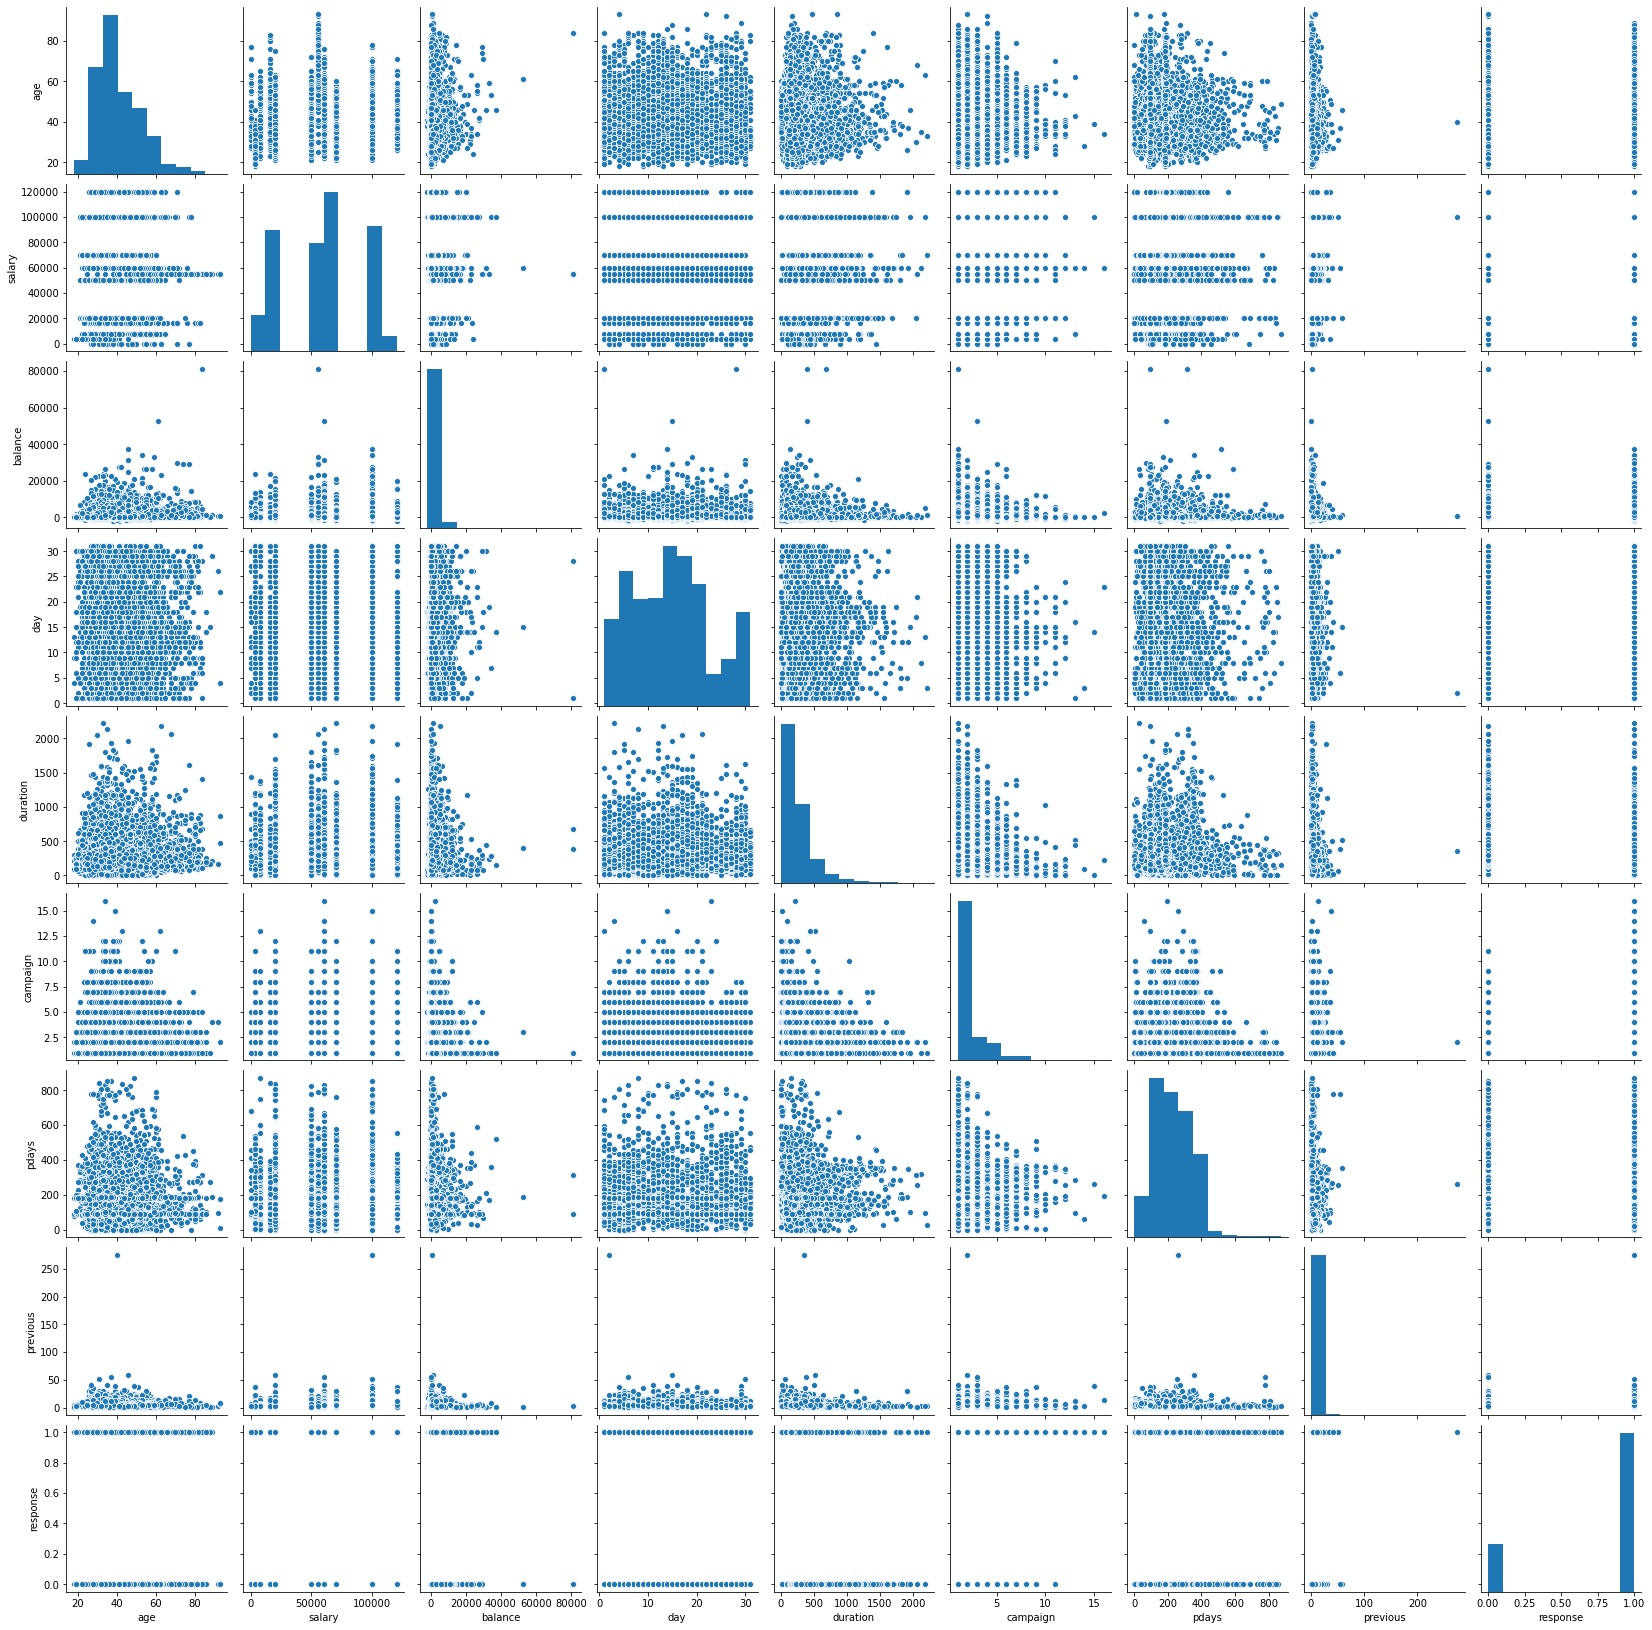

In [23]:
sns.pairplot(bank_new)
plt.show()

<font color='green'>We can observe that data here is not-symmetric. So lets find out the correlation matrix to look into details.</font>

## Correlation Matrix

In [24]:
bank_new.corr()

age    salary   balance       day  duration  campaign  \
age       1.000000  0.058322  0.115480  0.018399  0.060519  0.003842   
salary    0.058322  1.000000  0.066079  0.002379  0.005734 -0.018559   
balance   0.115480  0.066079  1.000000  0.051732  0.040998 -0.008150   
day       0.018399  0.002379  0.051732  1.000000 -0.012687 -0.029295   
duration  0.060519  0.005734  0.040998 -0.012687  1.000000 -0.088394   
campaign  0.003842 -0.018559 -0.008150 -0.029295 -0.088394  1.000000   
pdays    -0.107863 -0.106134 -0.108122 -0.090095 -0.024407  0.050534   
previous  0.002280  0.028427  0.001570 -0.016801 -0.002150  0.135523   
response -0.072577 -0.036774 -0.076995 -0.029952 -0.342610  0.094110   

             pdays  previous  response  
age      -0.107863  0.002280 -0.072577  
salary   -0.106134  0.028427 -0.036774  
balance  -0.108122  0.001570 -0.076995  
day      -0.090095 -0.016801 -0.029952  
duration -0.024407 -0.002150 -0.342610  
campaign  0.050534  0.135523  0.094110  
pdays     1.000000 -0.021885  0.152206  
previous -0.021885  1.000000 -0.008622  
response  0.152206 -0.008622  1.000000

<font color='green'>If responce increase than pdays and campaign are correlated becuase they are also increasing by 15.22% and 9.41% and when responce decrease than duration also decrease by 34.26%</font>

## Heat Map to Visualise correlation

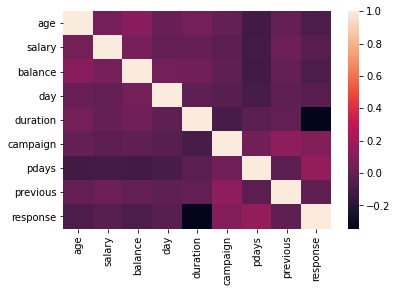

In [25]:
sns.heatmap(bank_new.corr())

<font color='green'>As per the pairplot, correlation matrix, and heatmap, observations as follow:</font>

## Make suitable plots for associations with numerical features and categorical features

- creating loop to know the numerical columns and catogorical columns

In [26]:
cat_col = []
num_col = []
for col in bank_new.columns:
    if bank_new[col].dtype=='O':
        cat_col.append(col)
    else:
        num_col.append(col)

In [27]:
print("catogorical features :",cat_col)
print("numarical features :",num_col)

catogorical features : ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numarical features : ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


- Relation of different columns with the target variable i.e response</font></h2>

In [28]:
sns.catplot("response","pdays",data=bank_new)

In [29]:
sns.catplot("response","campaign",data=bank)

<font color='green'>Upto 20 there are almost equal density for response Yes and No, but after compaign value 20 most of the time response is No.</font>

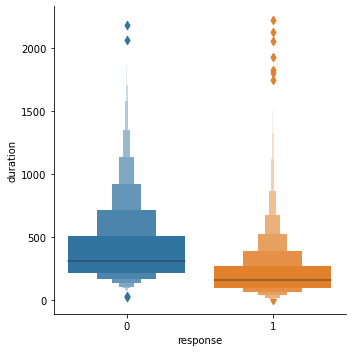

In [30]:
sns.catplot(x='response' , y='duration' , kind ="boxen", data =bank_new)

## Are the features about the previous campaign data useful?

In [31]:
bank_new['previous'].value_counts()

1      2772
2      2106
3      1142
4       714
5       459
6       277
7       205
8       129
9        92
10       67
11       65
12       44
13       38
15       20
14       19
17       15
16       13
19       11
20        8
23        8
18        6
22        6
27        5
24        5
21        4
29        4
25        4
30        3
37        2
28        2
26        2
38        2
32        1
40        1
55        1
41        1
58        1
51        1
275       1
35        1
Name: previous, dtype: int64

<font color='green'>Yes, it is important as we can see no of contacts performed before this campaign for the client and further what actions can be taken so that the client subscribes.</font>

## Are pdays and poutcome associated with the target

<font color='green'>As from the correlation Matrix we observed that pdays is associated with target(responce) by 15.22%</font>

In [32]:
pd.crosstab(bank_new['poutcome'],bank['response'])

response    no  yes
poutcome           
failure   4283  618
other     1533  307
success    533  978
unknown      3    2

<font color='green'>Above are the relation between poutcome and response,Thus we can say that only in case of success response is much, and in case of failure poutcome response is NO most of the time</font>

In [33]:
bank['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

<font color='green'> As we see, most of the data contain -1 values in pdays column, so we can't ignore that.</font>

## If yes(pdays and poutcome are associated with target), and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

<font color='green'> As above mentioned pdays is associated with the target but most of the values are -1 in pdays column, so we can't ignore them, so here we will drop the entire column pdays from bank dataset to reduced error</font> 

In [34]:
bank.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  pdays  previous  \
0     yes   no  unknown    5   may       261         1     -1         0   
1     yes   no  unknown    5   may       151         1     -1         0   
2     yes  yes  unknown    5   may        76         1     -1         0   
3     yes   no  unknown    5   may        92         1     -1         0   
4      no   no  unknown    5   may       198         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

In [35]:
bank.drop(['pdays'], axis=1, inplace=True)
bank.head()

age           job  salary  marital  education targeted default  balance  \
0   58    management  100000  married   tertiary      yes      no     2143   
1   44    technician   60000   single  secondary      yes      no       29   
2   33  entrepreneur  120000  married  secondary      yes      no        2   
3   47   blue-collar   20000  married    unknown       no      no     1506   
4   33       unknown       0   single    unknown       no      no        1   

  housing loan  contact  day month  duration  campaign  previous poutcome  \
0     yes   no  unknown    5   may       261         1         0  unknown   
1     yes   no  unknown    5   may       151         1         0  unknown   
2     yes  yes  unknown    5   may        76         1         0  unknown   
3     yes   no  unknown    5   may        92         1         0  unknown   
4      no   no  unknown    5   may       198         1         0  unknown   

  response  
0       no  
1       no  
2       no  
3       no  
4       no

<font color='green'> Here, we delete pdays columns</font>

## Feature Selection techniques: following are the techniques that we have

## Which feature selection technique should be used for our data?

## Before the predictive modeling part, make sure to perform

- The necessary transformations for the categorical variables and the numeric variable

In [36]:
bank_new

age           job  salary  marital  education targeted default  \
24060   33        admin.   50000  married   tertiary      yes      no   
24062   42        admin.   50000   single  secondary      yes      no   
24064   33      services   70000  married  secondary      yes      no   
24072   36    management  100000  married   tertiary      yes      no   
24077   36    management  100000  married   tertiary      yes      no   
...    ...           ...     ...      ...        ...      ...     ...   
45199   34   blue-collar   20000   single  secondary      yes      no   
45201   53    management  100000  married   tertiary      yes      no   
45204   73       retired   55000  married  secondary      yes      no   
45208   72       retired   55000  married  secondary      yes      no   
45210   37  entrepreneur  120000  married  secondary      yes      no   

       balance housing loan    contact  day month  duration  campaign  pdays  \
24060      882      no   no  telephone   21   oct        39         1    151   
24062     -247     yes  yes  telephone   21   oct       519         1    166   
24064     3444     yes   no  telephone   21   oct       144         1     91   
24072     2415     yes   no  telephone   22   oct        73         1     86   
24077        0     yes   no  telephone   23   oct       140         1    143   
...        ...     ...  ...        ...  ...   ...       ...       ...    ...   
45199     1475     yes   no   cellular   16   nov      1166         3    530   
45201      583      no   no   cellular   17   nov       226         1    184   
45204     2850      no   no   cellular   17   nov       300         1     40   
45208     5715      no   no   cellular   17   nov      1127         5    184   
45210     2971      no   no   cellular   17   nov       361         2    188   

       previous poutcome  response  
24060         3  failure         1  
24062         1    other         0  
24064         4  failure         0  
24072         4    other         1  
24077         3  failure         0  
...         ...      ...       ...  
45199        12    other         1  
45201         4  success         0  
45204         8  failure         0  
45208         3  success         0  
45210        11    other         1  

[8257 rows x 19 columns]

In [37]:
bank_new.head()

age         job  salary  marital  education targeted default  balance  \
24060   33      admin.   50000  married   tertiary      yes      no      882   
24062   42      admin.   50000   single  secondary      yes      no     -247   
24064   33    services   70000  married  secondary      yes      no     3444   
24072   36  management  100000  married   tertiary      yes      no     2415   
24077   36  management  100000  married   tertiary      yes      no        0   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
24060      no   no  telephone   21   oct        39         1    151         3   
24062     yes  yes  telephone   21   oct       519         1    166         1   
24064     yes   no  telephone   21   oct       144         1     91         4   
24072     yes   no  telephone   22   oct        73         1     86         4   
24077     yes   no  telephone   23   oct       140         1    143         3   

      poutcome  response  
24060  failure         1  
24062    other         0  
24064  failure         0  
24072    other         1  
24077  failure         0

In [38]:
from sklearn.preprocessing import LabelEncoder


In [39]:
no = LabelEncoder()

bank['housing'] = no.fit_transform(bank['housing'].astype('str'))
bank['loan'] = no.fit_transform(bank['loan'].astype('str'))
bank

age           job  salary   marital  education targeted default  \
0       58    management  100000   married   tertiary      yes      no   
1       44    technician   60000    single  secondary      yes      no   
2       33  entrepreneur  120000   married  secondary      yes      no   
3       47   blue-collar   20000   married    unknown       no      no   
4       33       unknown       0    single    unknown       no      no   
...    ...           ...     ...       ...        ...      ...     ...   
45206   51    technician   60000   married   tertiary      yes      no   
45207   71       retired   55000  divorced    primary      yes      no   
45208   72       retired   55000   married  secondary      yes      no   
45209   57   blue-collar   20000   married  secondary      yes      no   
45210   37  entrepreneur  120000   married  secondary      yes      no   

       balance  housing  loan    contact  day month  duration  campaign  \
0         2143        1     0    unknown    5   may       261         1   
1           29        1     0    unknown    5   may       151         1   
2            2        1     1    unknown    5   may        76         1   
3         1506        1     0    unknown    5   may        92         1   
4            1        0     0    unknown    5   may       198         1   
...        ...      ...   ...        ...  ...   ...       ...       ...   
45206      825        0     0   cellular   17   nov       977         3   
45207     1729        0     0   cellular   17   nov       456         2   
45208     5715        0     0   cellular   17   nov      1127         5   
45209      668        0     0  telephone   17   nov       508         4   
45210     2971        0     0   cellular   17   nov       361         2   

       previous poutcome response  
0             0  unknown       no  
1             0  unknown       no  
2             0  unknown       no  
3             0  unknown       no  
4             0  unknown       no  
...         ...      ...      ...  
45206         0  unknown      yes  
45207         0  unknown      yes  
45208         3  success      yes  
45209         0  unknown       no  
45210        11    other       no  

[45211 rows x 18 columns]

In [40]:
bank['job'] = bank['job'].map(lambda x: x.rstrip("."))

In [41]:
bank['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

## Handle variables corresponding to the previous campaign
 

In [42]:
bank['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

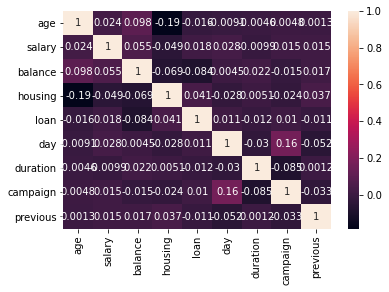

In [43]:
sns.heatmap(bank.corr(),annot=True)
plt.show()

## Train test split

In [44]:
bank_new.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [45]:
x = bank_new.iloc[:, 1:-1]
print('Independent Variables are:\n', x.head(2))

Independent Variables are:
           job  salary  marital  education targeted default  balance housing  \
24060  admin.   50000  married   tertiary      yes      no      882      no   
24062  admin.   50000   single  secondary      yes      no     -247     yes   

      loan    contact  day month  duration  campaign  pdays  previous poutcome  
24060   no  telephone   21   oct        39         1    151         3  failure  
24062  yes  telephone   21   oct       519         1    166         1    other  


In [46]:
y = bank_new.iloc[:, [-1]]
print('Target Variable is:\n', y.head(2))

Target Variable is:
        response
24060         1
24062         0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=22)

# Predictive model 1:Logistic regression

## -Make a predictive model using logistic regression

In [49]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [50]:
log_reg = LogisticRegression()

In [51]:
df = bank_new[cat_col].apply(no.fit_transform)

In [52]:
df

job  marital  education  targeted  default  housing  loan  contact  \
24060    0        1          2         1        0        0     0        1   
24062    0        2          1         1        0        1     1        1   
24064    7        1          1         1        0        1     0        1   
24072    4        1          2         1        0        1     0        1   
24077    4        1          2         1        0        1     0        1   
...    ...      ...        ...       ...      ...      ...   ...      ...   
45199    1        2          1         1        0        1     0        0   
45201    4        1          2         1        0        0     0        0   
45204    5        1          1         1        0        0     0        0   
45208    5        1          1         1        0        0     0        0   
45210    2        1          1         1        0        0     0        0   

       month  poutcome  
24060     10         0  
24062     10         1  
24064     10         0  
24072     10         1  
24077     10         0  
...      ...       ...  
45199      9         1  
45201      9         2  
45204      9         0  
45208      9         2  
45210      9         1  

[8257 rows x 10 columns]

In [53]:
data_prep=df.join(bank_new[num_col])
data_prep

job  marital  education  targeted  default  housing  loan  contact  \
24060    0        1          2         1        0        0     0        1   
24062    0        2          1         1        0        1     1        1   
24064    7        1          1         1        0        1     0        1   
24072    4        1          2         1        0        1     0        1   
24077    4        1          2         1        0        1     0        1   
...    ...      ...        ...       ...      ...      ...   ...      ...   
45199    1        2          1         1        0        1     0        0   
45201    4        1          2         1        0        0     0        0   
45204    5        1          1         1        0        0     0        0   
45208    5        1          1         1        0        0     0        0   
45210    2        1          1         1        0        0     0        0   

       month  poutcome  age  salary  balance  day  duration  campaign  pdays  \
24060     10         0   33   50000      882   21        39         1    151   
24062     10         1   42   50000     -247   21       519         1    166   
24064     10         0   33   70000     3444   21       144         1     91   
24072     10         1   36  100000     2415   22        73         1     86   
24077     10         0   36  100000        0   23       140         1    143   
...      ...       ...  ...     ...      ...  ...       ...       ...    ...   
45199      9         1   34   20000     1475   16      1166         3    530   
45201      9         2   53  100000      583   17       226         1    184   
45204      9         0   73   55000     2850   17       300         1     40   
45208      9         2   72   55000     5715   17      1127         5    184   
45210      9         1   37  120000     2971   17       361         2    188   

       previous  response  
24060         3         1  
24062         1         0  
24064         4         0  
24072         4         1  
24077         3         0  
...         ...       ...  
45199        12         1  
45201         4         0  
45204         8         0  
45208         3         0  
45210        11         1  

[8257 rows x 19 columns]

In [54]:
data_prep.corr()

job   marital  education  targeted   default   housing  \
job        1.000000  0.072746   0.159280 -0.091197 -0.021012 -0.132378   
marital    0.072746  1.000000   0.121688 -0.255247 -0.005632 -0.056963   
education  0.159280  0.121688   1.000000 -0.632513 -0.013682 -0.129804   
targeted  -0.091197 -0.255247  -0.632513  1.000000  0.019593  0.087470   
default   -0.021012 -0.005632  -0.013682  0.019593  1.000000  0.022644   
housing   -0.132378 -0.056963  -0.129804  0.087470  0.022644  1.000000   
loan      -0.033500 -0.055435  -0.047718  0.070420  0.052261  0.109815   
contact   -0.006279 -0.031866  -0.048456  0.020464 -0.019834 -0.069869   
month     -0.002498 -0.024130  -0.010829  0.010187  0.020123  0.014452   
poutcome   0.066642  0.045015   0.082852 -0.071356 -0.025566 -0.284439   
age       -0.020606 -0.414972  -0.119516  0.140750 -0.027825 -0.179386   
salary     0.115271 -0.042212   0.423157 -0.228338  0.000361 -0.035905   
balance    0.041975 -0.019767   0.074166 -0.052007 -0.045010 -0.109163   
day        0.013841  0.016797   0.023542 -0.026179 -0.001013 -0.066740   
duration   0.024449 -0.009075  -0.001142 -0.014729 -0.002635 -0.072070   
campaign  -0.008764 -0.008338  -0.024343  0.017948 -0.002064  0.063071   
pdays     -0.110505 -0.011861  -0.140155  0.075638  0.033760  0.335124   
previous  -0.000266  0.004536   0.000115 -0.001205  0.012149  0.008934   
response  -0.081239 -0.049234  -0.108098  0.091216  0.028299  0.317501   

               loan   contact     month  poutcome       age    salary  \
job       -0.033500 -0.006279 -0.002498  0.066642 -0.020606  0.115271   
marital   -0.055435 -0.031866 -0.024130  0.045015 -0.414972 -0.042212   
education -0.047718 -0.048456 -0.010829  0.082852 -0.119516  0.423157   
targeted   0.070420  0.020464  0.010187 -0.071356  0.140750 -0.228338   
default    0.052261 -0.019834  0.020123 -0.025566 -0.027825  0.000361   
housing    0.109815 -0.069869  0.014452 -0.284439 -0.179386 -0.035905   
loan       1.000000 -0.020904  0.000524 -0.103154 -0.008330  0.013788   
contact   -0.020904  1.000000  0.047045  0.024590  0.166384 -0.035805   
month      0.000524  0.047045  1.000000 -0.019188  0.013909  0.019820   
poutcome  -0.103154  0.024590 -0.019188  1.000000  0.051987  0.013079   
age       -0.008330  0.166384  0.013909  0.051987  1.000000  0.058322   
salary     0.013788 -0.035805  0.019820  0.013079  0.058322  1.000000   
balance   -0.085004  0.030317  0.015723  0.051464  0.115480  0.066079   
day        0.007550 -0.012330 -0.024264  0.017125  0.018399  0.002379   
duration  -0.033874 -0.036360 -0.036446  0.108473  0.060519  0.005734   
campaign   0.007444  0.063199  0.023224 -0.000502  0.003842 -0.018559   
pdays      0.022454  0.077235  0.022529 -0.235119 -0.107863 -0.106134   
previous   0.016549  0.043830  0.013977  0.041607  0.002280  0.028427   
response   0.115805  0.014321  0.009586 -0.420519 -0.072577 -0.036774   

            balance       day  duration  campaign     pdays  previous  \
job        0.041975  0.013841  0.024449 -0.008764 -0.110505 -0.000266   
marital   -0.019767  0.016797 -0.009075 -0.008338 -0.011861  0.004536   
education  0.074166  0.023542 -0.001142 -0.024343 -0.140155  0.000115   
targeted  -0.052007 -0.026179 -0.014729  0.017948  0.075638 -0.001205   
default   -0.045010 -0.001013 -0.002635 -0.002064  0.033760  0.012149   
housing   -0.109163 -0.066740 -0.072070  0.063071  0.335124  0.008934   
loan      -0.085004  0.007550 -0.033874  0.007444  0.022454  0.016549   
contact    0.030317 -0.012330 -0.036360  0.063199  0.077235  0.043830   
month      0.015723 -0.024264 -0.036446  0.023224  0.022529  0.013977   
poutcome   0.051464  0.017125  0.108473 -0.000502 -0.235119  0.041607   
age        0.115480  0.018399  0.060519  0.003842 -0.107863  0.002280   
salary     0.066079  0.002379  0.005734 -0.018559 -0.106134  0.028427   
balance    1.000000  0.051732  0.040998 -0.008150 -0.108122  0.001570   
day        0.051732  1.000000 -0.012687 -0.029295 -0

<font color='green'>To find correlation between variables and if both variables are positively increasing then the value is positive and versa.IF 0 than no correlation between variables...</font>

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(40)

In [56]:
x = data_prep.drop("response", axis=1)
x.head()

job  marital  education  targeted  default  housing  loan  contact  \
24060    0        1          2         1        0        0     0        1   
24062    0        2          1         1        0        1     1        1   
24064    7        1          1         1        0        1     0        1   
24072    4        1          2         1        0        1     0        1   
24077    4        1          2         1        0        1     0        1   

       month  poutcome  age  salary  balance  day  duration  campaign  pdays  \
24060     10         0   33   50000      882   21        39         1    151   
24062     10         1   42   50000     -247   21       519         1    166   
24064     10         0   33   70000     3444   21       144         1     91   
24072     10         1   36  100000     2415   22        73         1     86   
24077     10         0   36  100000        0   23       140         1    143   

       previous  
24060         3  
24062         1  
24064         4  
24072         4  
24077         3

In [57]:
y= data_prep[['response']]
y.head()

response
24060         1
24062         0
24064         0
24072         1
24077         0

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)

In [59]:
log_reg.fit(x_train,y_train)

LogisticRegression()

In [60]:
val=cross_val_score(log_reg,x_train,y_train,cv=5)

In [61]:
print(np.mean(val))

0.7841029523088568


In [62]:
y_pred=log_reg.predict(x_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.17      0.26       385
           1       0.79      0.95      0.86      1267

    accuracy                           0.77      1652
   macro avg       0.66      0.56      0.56      1652
weighted avg       0.73      0.77      0.72      1652



In [64]:
print(confusion_matrix(y_test,y_pred))

[[  67  318]
 [  61 1206]]


In [65]:
f1_score(y_pred,y_test)

0.8642063776424221

## Use RFE to select top n features in an automated fashion (choose n as you see fit)

In [66]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
rfe = RFE(log_reg, 5)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [67]:
rfe.support_

array([False, False,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False])

In [68]:
x_train.columns[rfe.support_]

Index(['education', 'default', 'housing', 'loan', 'poutcome'], dtype='object')

In [69]:
cols = x_train.columns[rfe.support_]

In [70]:
log_reg.fit(x_train[cols],y_train)

LogisticRegression()

In [71]:
y_pred2 = log_reg.predict(x_test[cols])

In [72]:
f1_score(y_pred2,y_test)

0.8893838158871566

In [73]:
confusion_matrix(y_pred2,y_test)

array([[ 156,   69],
       [ 229, 1198]], dtype=int64)

In [74]:
import statsmodels.api as stm

In [75]:
x_train.head()

job  marital  education  targeted  default  housing  loan  contact  \
28745    4        1          2         1        0        0     0        0   
29630    9        2          2         0        0        1     0        0   
27511    9        1          1         1        0        1     1        0   
44349    4        2          2         0        0        0     0        0   
25276    1        1          1         1        0        0     1        0   

       month  poutcome  age  salary  balance  day  duration  campaign  pdays  \
28745      4         0   50  100000        0   30       199         1    205   
29630      3         2   32   60000      703    3       489         2    271   
27511      9         0   41   60000     2125   21       285         3    116   
44349      5         2   45  100000     4831   30       852         3    182   
25276      9         1   34   20000      932   18       148         2    132   

       previous  
28745         1  
29630         2  
27511         4  
44349        11  
25276         1

In [76]:
x_train_stm = stm.add_constant(x_train[cols])

x_train_stm.head()

const  education  default  housing  loan  poutcome
28745    1.0          2        0        0     0         0
29630    1.0          2        0        1     0         2
27511    1.0          1        0        1     1         0
44349    1.0          2        0        0     0         2
25276    1.0          1        0        0     1         1

In [77]:
reg1 = stm.OLS(endog=y_train,exog= x_train_stm).fit()

In [78]:
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:24:45   Log-Likelihood:                -2810.1
No. Observations:                6605   AIC:                             5632.
Df Residuals:                    6599   BIC:                             5673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8010      0.013     62.979      0.000       0.776       0.826
education     -0.0333      0.006     -5.253      0.000      -0.046      -0.021
default        0.0356      0.055      0.649      0.516      -0.072       0.143
housing        0.1782      0.010     17.920      0.000       0.159       0.198
loan           0.0706      0.013      5.298      0.000       0.044       0.097
poutcome      -0.1891      0.006    -30.686      0.000      -0.201      -0.177
==============================================================================
Omnibus:                      756.977   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1039.732
Skew:                          -0.957   Prob(JB):                    1.68e-226
Kurtosis:                       3.341   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using p values and VIF, get rid of the redundant features

In [79]:
from statsmodels.stats .outliers_influence import variance_inflation_factor

<font color='green'>1 = not correlated. Between 1 and 5 = moderately correlated. Greater than 5 = highly correlated.</font>

In [80]:
vif=pd.DataFrame()

In [81]:
vif['features']=x_train.columns

In [82]:
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [83]:
vif

features    VIF
10        age  11.71
3    targeted   6.47
2   education   6.42
16      pdays   5.37
11     salary   5.34
1     marital   4.44
13        day   4.08
8       month   3.63
5     housing   3.22
0         job   2.85
15   campaign   2.76
14   duration   2.24
9    poutcome   1.74
17   previous   1.47
12    balance   1.29
6        loan   1.20
7     contact   1.15
4     default   1.02

## Estimate the model performance using k fold cross validation

In [84]:
from sklearn.model_selection import KFold

In [85]:
kfold = KFold(3, True, 1)

## Which features are the most important from your model?

<font color='green'> Housing, loan, default, poutcome are important feature from logistic regression model perspective</font>

# Predictive model 2: Random Forest

## Make a predictive model using random forest technique

In [86]:
from sklearn.ensemble import RandomForestClassifier

## Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [87]:
classifier=RandomForestClassifier(n_estimators=100,max_features=5,max_depth=5,criterion='entropy',random_state=0)

In [88]:
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       random_state=0)

## -Estimate the model performance using k fold cross validation

In [89]:
score=cross_val_score(classifier,x_train,y_train,cv=5)

In [90]:
print(np.mean(score))

0.8410295230885693


In [91]:
y_pred1 = classifier.predict(x_test)

## -What is the precision, recall, accuracy of your model?

In [92]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.48      0.59       385
           1       0.86      0.95      0.90      1267

    accuracy                           0.84      1652
   macro avg       0.80      0.72      0.74      1652
weighted avg       0.83      0.84      0.83      1652



In [93]:
confusion_matrix(y_test,y_pred1)

array([[ 185,  200],
       [  61, 1206]], dtype=int64)

## Using the feature importance values from the Random Forest module, identify the most important features for the mode

In [94]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler=MinMaxScaler()

In [96]:
rfe1 = RFE(classifier, 5)
rfe1.fit(x_train,y_train)

RFE(estimator=RandomForestClassifier(criterion='entropy', max_depth=5,
                                     max_features=5, random_state=0),
    n_features_to_select=5)

In [97]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [98]:
x_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [99]:
classifier.fit(x_train[cols],y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=5,
                       random_state=0)

In [100]:
y_pred3 = classifier.predict(x_test[cols])

In [101]:
f1_score(y_pred3,y_test)

0.8847040737893926

In [102]:
confusion_matrix(y_pred3,y_test)

array([[ 201,  116],
       [ 184, 1151]], dtype=int64)

In [103]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57       385
           1       0.86      0.91      0.88      1267

    accuracy                           0.82      1652
   macro avg       0.75      0.72      0.73      1652
weighted avg       0.81      0.82      0.81      1652



In [104]:
val1=cross_val_score(classifier,x_train,y_train,cv=5)

In [105]:
print(np.mean(val1))

0.8410295230885693


# Compare the performance of the Random Forest and the logistic model

## Evaluate both models on the test set

<font color='blue'>As we have done Above</font>

## Which metric did you choose and why

<font color='blue'>Various ways to check the performance of our machine learning : Confusion matrix Accuracy Precision Recall Specificity F1 score Precision-Recall</font>

## Which model has better performance on the test set?

<font color='blue'>Random forest has the better performance</font>

## Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

<font color='blue'> No, some of them are different</font>